In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
player_df = pd.read_csv('players.csv')
valuation_df = pd.read_csv('player_valuations.csv')

# Drop unnecessary columns from 'player_df'
columns_to_drop = [
     'sub_position', 'position', 'foot', 'height_in_cm',
    'contract_expiration_date', 'agent_name', 'image_url', 'url',
    'current_club_domestic_competition_id', 'current_club_name', 'market_value_in_eur'
]

player_df = player_df.drop(columns=columns_to_drop, errors='ignore')

# Merge datasets on 'player_id'
merged_df = pd.merge(player_df, valuation_df, on='player_id', how='inner')



# Display the merged dataset
print(merged_df)


        player_id first_name        last_name                name  \
0              10   Miroslav            Klose      Miroslav Klose   
1              10   Miroslav            Klose      Miroslav Klose   
2              10   Miroslav            Klose      Miroslav Klose   
3              10   Miroslav            Klose      Miroslav Klose   
4              10   Miroslav            Klose      Miroslav Klose   
...           ...        ...              ...                 ...   
180115     460663  Kerim Can         Güzeldal  Kerim Can Güzeldal   
180116     462348        NaN  Mostafa Mohamed     Mostafa Mohamed   
180117     464142      Diego      Snepvangers   Diego Snepvangers   
180118     469986      Ahmed          Mostafa       Ahmed Mostafa   
180119     472157        NaN        João Lima           João Lima   

        last_season  current_club_id_x         player_code country_of_birth  \
0              2015                398      miroslav-klose           Poland   
1            

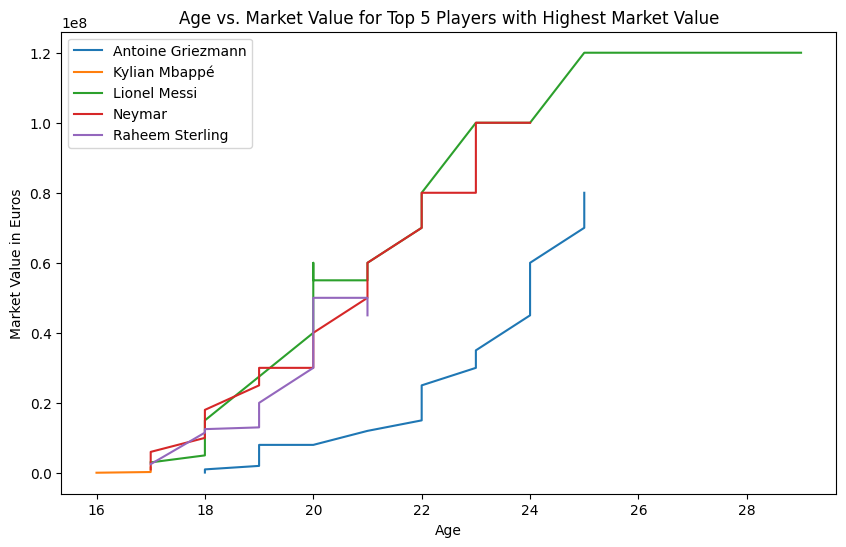

In [ ]:
#Research Question 1: Is there a correlation between the age of football players and their market values in euros?
merged_df['date_of_birth'] = pd.to_datetime(merged_df['date_of_birth'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate the age of each player based on 'date_of_birth' and 'date'
merged_df['age'] = (merged_df['date'] - merged_df['date_of_birth']).dt.days // 365

# Filter the top 5 players with the highest market values
top5_players = merged_df.groupby('name')['highest_market_value_in_eur'].max().nlargest(5).index
top5_df = merged_df[merged_df['name'].isin(top5_players)]

# Set up the visualization figure size
plt.figure(figsize=(10, 6))

# Plot the age vs. market value for each player in the top 5
for player_name, player_data in top5_df.groupby('name'):
    plt.plot(player_data['age'], player_data['market_value_in_eur'], label=player_name)

# Add title and labels to the plot
plt.title('Age vs. Market Value for Top 5 Players with Highest Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value in Euros')

# Add legend to distinguish players
plt.legend()

# Display the plot
plt.show()

#  Answer: Our analysis suggests that, generally, older football players tend to have higher market values in euros.

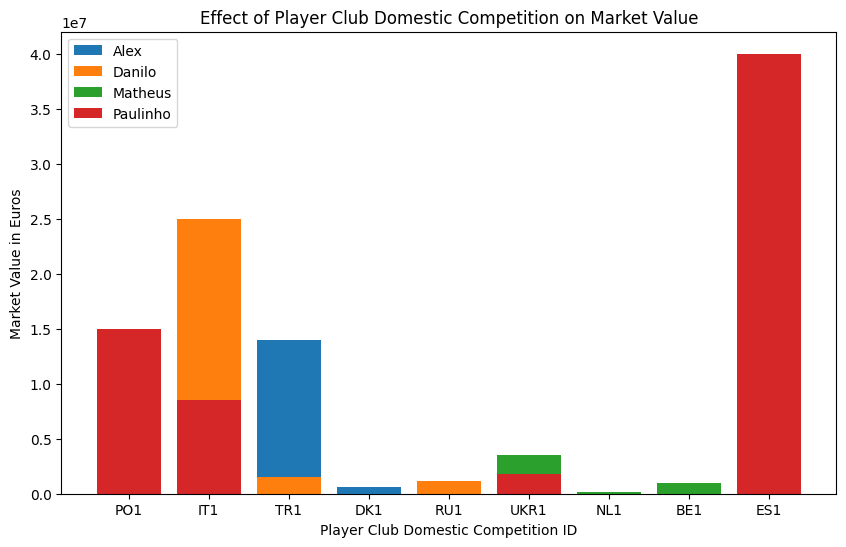

In [ ]:

#Research Question: How does the player_club_domestic_competition_id, specifically focusing on the top 4 players with the most distinct values in this category, influence their market values in euros

# Identify the top 5 players with the most distinct player_club_domestic_competition_id values
top5_players_distinct_competition = merged_df.groupby('name')['player_club_domestic_competition_id'].nunique().nlargest(4).index
top5_distinct_df = merged_df[merged_df['name'].isin(top5_players_distinct_competition)]

# Visualization using a grouped bar chart

# Step 1: Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Step 2: Iterate through each player in the top 5 distinct competition players
for player_name, player_data in top5_distinct_df.groupby('name'):
    # Step 3: Create a bar plot for each player
    plt.bar(player_data['player_club_domestic_competition_id'], player_data['highest_market_value_in_eur'], label=player_name)

# Step 4: Add title and labels to the plot
plt.title('Effect of Player Club Domestic Competition on Market Value')
plt.xlabel('Player Club Domestic Competition ID')
plt.ylabel('Market Value in Euros')

# Step 5: Add legend to distinguish players
plt.legend()

# Step 6: Display the plot
plt.show()

# Answer: The Player Club Domestic Competition ID exhibits a significant impact on player market values, as evidenced by the distinct variations observed in the grouped bar chart for the top 4 players.